# Explanation of notebook

This notebook does the following :

LINE PLOT :
* selects the index p of the particles for each zone (gyre, north, west, east, east_west, masked at all time) thanks to count_in_zones(). They are saved in dictionary Index_Ensembles[NPP]
* goes through the indexes of 'north' and test a threshold of minimum 3 time steps over the front and saves in Ind_parti_north[NPP] the parti that pass the threshold test and in Ind_parti_stay_gyre[NPP] the parti that don't pass the threshold test and are therefore considered part of the 'gyre' category
* loops to save the t indexes of particles that go north thanks to Ind_parti_north[NPP] (use of southern_front), called T_step_parti_north[NPP]
* adds the index of parti in RS to index of parti that are considered in RS after test of threshold : Index_Ensembles[NPP]['gyre'] + Ind_parti_stay_gyre[NPP]
* creates new list for indexes of parti that go north equal to the list obtained with threshold Index_Ensembles[NPP]['north'] = Ind_parti_north[NPP]
* now that we have all the indexes for each zone, we calculate the evolution over time thanks to count_zones2()
* we store the results in a dictionary Ensembles[NPP]
* we sum up all the NPPs in Sum_Zones[NPP]
* we plot the line plot thanks to Sum_Zones[NPP]

HISTOGRAMS : 
* thanks to Ind_parti_north[NPP] and T_step_parti_north[NPP] we calculate the depths, lons and times (year and month) of the crossing of the front
* we plot 3 histograms

In [1]:
from func_pickle import pickle_save, pickle_load

In [2]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [3]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)
southern_front = np.ma.masked_array(southern_front, mask=False)

In [4]:
W_boundary = 12 # 121,04 degrees
E_boundary = 1560 # 250,04 degrees

In [5]:
# Create a meshgrid to plot in index coordinates
xc = np.arange(1801)
yc = np.arange(1024)
xc, yc = np.meshgrid(xc,yc)

In [6]:
npts = 10000

In [7]:
max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Z = ['Z1','Z2','Z3','Z4','Z5','dead']

***

In [8]:
path_load = '/data/ebent/Octopus/output/50m_line_RG/'

In [9]:
path_save = '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/'

***

## Load variables calculated in this notebook

In [10]:
Index_Ensembles = pickle_load('Index_Ensembles', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Index_Ensembles.npy')


In [11]:
Ind_parti_north = pickle_load('Ind_parti_north', path_save)
T_step_parti_north = pickle_load('T_step_parti_north', path_save)

Ind_parti_stay_gyre = pickle_load('Ind_parti_stay_gyre', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ind_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/T_step_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ind_parti_stay_gyre.npy')


In [12]:
Ensembles = pickle_load('Ensembles', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ensembles.npy')


In [13]:
Sum_Zones = pickle_load('Sum_Zones', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Sum_Zones.npy')


In [14]:
DEP_cross = pickle_load('DEP_cross', path_save)
LON_cross = pickle_load('LON_cross', path_save)
TIME_cross = pickle_load('TIME_cross', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/DEP_cross.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/LON_cross.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/TIME_cross.npy')


In [15]:
Five_Years_1_list = pickle_load('Five_Years_1_list', path_load)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/Five_Years_1_list.npy')


In [16]:
analysis = []
for i in range(len(TIME_cross)):
    analysis.append(Five_Years_1_list[np.array(TIME_cross[i])*10])

In [17]:
from collections import Counter

num = Counter(analysis)

In [18]:
x = list(num.values())
y = list(num.keys())

In [19]:
X = list(x)
Y = list(y)

In [20]:
for i in range(12):
    if y[i] == 'JAN':
        Y[0] = y[i]
        X[0] = x[i]
    if y[i] == 'FEV':
        Y[1] = y[i]
        X[1] = x[i]
    if y[i] == 'MAR':
        Y[2] = y[i]
        X[2] = x[i]
    if y[i] == 'APR':
        Y[3] = y[i]
        X[3] = x[i]
    if y[i] == 'MAY':
        Y[4] = y[i]
        X[4] = x[i]
    if y[i] == 'JUN':
        Y[5] = y[i]
        X[5] = x[i]
    if y[i] == 'JUL':
        Y[6] = y[i]
        X[6] = x[i]
    if y[i] == 'AUG':
        Y[7] = y[i]
        X[7] = x[i]
    if y[i] == 'SEP':
        Y[8] = y[i]
        X[8] = x[i]
    if y[i] == 'OCT':
        Y[9] = y[i]
        X[9] = x[i]
    if y[i] == 'NOV':
        Y[10] = y[i]
        X[10] = x[i]
    if y[i] == 'DEC':
        Y[11] = y[i]
        X[11] = x[i]

In [21]:
for i in range(12):
    print i, Y[i]

0 JAN
1 FEV
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


***

# Line plot

### Select the index of the particles in each zone

In [68]:
def count_in_zones(NPP, xround, yround, zround):
    to_east = []
    to_west = []
    to_north = []
    in_RG = []
    to_west_east = []
    are_masked = []
    
    for p in range(npts):
        south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
        south_front.mask = xround[:,p].mask
        
        north_outside_RG = np.squeeze(np.array(np.ma.where(south_front==0))) # don't forget to use np.ma when dealing with masks
        west_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]<=W_boundary))) 
        east_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]>=E_boundary)))
        parti_are_masked = np.squeeze(np.array(np.ma.where(xround.mask[:,p]==False)))
        
        if north_outside_RG.size==0. and west_outside_RG.size==0. and east_outside_RG.size==0. and parti_are_masked.size>0.:
            in_RG.append(p)
        if north_outside_RG.size>0. and parti_are_masked.size>0.:
            to_north.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size>0. and east_outside_RG.size==0. and parti_are_masked.size>0.:
            to_west.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size==0. and east_outside_RG.size>0. and parti_are_masked.size>0.:
            to_east.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size>0. and east_outside_RG.size>0. and parti_are_masked.size>0.:
            to_west_east.append(p)
        if parti_are_masked.size==0.:
            are_masked.append(p)
            
    print ''
    print 'NPP' + NPP + ' :'
    print ''
    print 'Particles that stay in the Ross Gyre :', len(in_RG)
    print 'Particles that go North :', len(to_north)
    print 'Particles that go West :', len(to_west)
    print 'Particles that go East :', len(to_east)
    print 'Particles that go East then West :', len(to_west_east)
    print 'Particles that are masked :', len(are_masked)
    print 'Total number of particles not dead :', len(in_RG)+len(to_north)+len(to_west)+len(to_east)+len(to_west_east)
    
    return in_RG, to_north, to_west, to_east, to_west_east, are_masked

### Stores the indexes of zones in a dictionary (Index_Ensembles) of dictionary (Index_Zones)
* particles that stay in gyre 
* particles that go north 
* particles that go west
* particles that go east
* particles that are masked all time steps

In [69]:
Index_Ensembles = {} 

for NPP in npp:
    Index_Zones = {}

    zround = pickle_load('NPP' + NPP + '_zround', path_load, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]

    Index_Zones['gyre'], Index_Zones['north'], Index_Zones['west'], Index_Zones['east'], Index_Zones['east_west'], Index_Zones['masked'] = count_in_zones(NPP, xround, yround, zround)
    Index_Ensembles[NPP] = Index_Zones

pickle_save('Index_Ensembles', path_save, Index_Ensembles)


NPP01 :

Particles that stay in the Ross Gyre : 6703
Particles that go North : 2294
Particles that go West : 49
Particles that go East : 954
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000

NPP02 :

Particles that stay in the Ross Gyre : 6961
Particles that go North : 2133
Particles that go West : 50
Particles that go East : 856
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000

NPP03 :

Particles that stay in the Ross Gyre : 6830
Particles that go North : 2191
Particles that go West : 58
Particles that go East : 921
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000

NPP04 :

Particles that stay in the Ross Gyre : 6909
Particles that go North : 2085
Particles that go West : 68
Particles that go East : 938
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead 

### Function to select parti north with threshold but save also index of parti that actualy ALWAYS stay in gyre

In [70]:
def thresh(to_north):
    thresh_in_gyre = []
    thresh_to_north = []
    for p in to_north:
        
        south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
        south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
        
        where_north = np.squeeze(np.ma.where(south_front==0))
        
        if where_north.size>2 and where_north[1]==where_north[0]+1 and where_north[2]==where_north[1]+1:
            thresh_to_north.append(p)
        
        else:
            thresh_in_gyre.append(p)
            
    return thresh_to_north, thresh_in_gyre

In [71]:
# Loop to save the p indexes of particles that go north after threshold and those who stay in the RS

Ind_parti_north = {}
Ind_parti_stay_gyre = {}

for NPP in npp:

    zround = pickle_load('NPP' + NPP + '_zround', path_load, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]

    to_north = Index_Ensembles[NPP]['north']
    
    thresh_to_north, thresh_in_gyre = thresh(to_north)
    
    Ind_parti_north[NPP] = thresh_to_north
    Ind_parti_stay_gyre[NPP] = thresh_in_gyre
    
    print ''
    print 'Particles that go North with threshold :', len(thresh_to_north)
    print 'Particles that stay in gyre with threshold :', len(thresh_in_gyre)
    print 'Sum : ', len(thresh_to_north) + len(thresh_in_gyre)
    
pickle_save('Ind_parti_north', path_save, Ind_parti_north)
pickle_save('Ind_parti_stay_gyre', path_save, Ind_parti_stay_gyre)


Particles that go North with threshold : 1402
Particles that stay in gyre with threshold : 892
Sum :  2294

Particles that go North with threshold : 1359
Particles that stay in gyre with threshold : 774
Sum :  2133

Particles that go North with threshold : 1401
Particles that stay in gyre with threshold : 790
Sum :  2191

Particles that go North with threshold : 1363
Particles that stay in gyre with threshold : 722
Sum :  2085

Particles that go North with threshold : 1301
Particles that stay in gyre with threshold : 814
Sum :  2115

Particles that go North with threshold : 1407
Particles that stay in gyre with threshold : 720
Sum :  2127

Particles that go North with threshold : 1272
Particles that stay in gyre with threshold : 682
Sum :  1954

Particles that go North with threshold : 1203
Particles that stay in gyre with threshold : 720
Sum :  1923

Particles that go North with threshold : 1170
Particles that stay in gyre with threshold : 621
Sum :  1791

Particles that go North wit

In [72]:
# Loop to save the t indexes of particles that go north thanks to index of p we selected above, use of southern_front

T_step_parti_north = {}

for NPP in npp:
    
    yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]

    t_to_north = []
    
    for i in range(len(Ind_parti_north[NPP])):
    
        tmp = np.squeeze(np.array(np.ma.where(southern_front[yround[:,Ind_parti_north[NPP][i]], xround[:,Ind_parti_north[NPP][i]]]==0)))
        
        if tmp.size == 1:
            t_to_north.append(np.int_(tmp))
        else:
            t_to_north.append(tmp[0])
                                  
    T_step_parti_north[NPP] = t_to_north

pickle_save('T_step_parti_north', path_save, T_step_parti_north)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/T_step_parti_north.npy')


### Check of nb of parti in RS and nb of parti considered in RS after threshold test

In [29]:
for NPP in npp:
    print 'Always in RS :', len(Index_Ensembles[NPP]['gyre']) 
    print 'In RS with threshold :', len(Ind_parti_stay_gyre[NPP])
    print 'Sum : ', len(Index_Ensembles[NPP]['gyre']) + len(Ind_parti_stay_gyre[NPP]) # this is = to new len of index for in RS
    print ''

Always in RS : 6703
In RS with threshold : 892
Sum :  7595

Always in RS : 6961
In RS with threshold : 774
Sum :  7735

Always in RS : 6830
In RS with threshold : 790
Sum :  7620

Always in RS : 6909
In RS with threshold : 722
Sum :  7631

Always in RS : 6890
In RS with threshold : 814
Sum :  7704

Always in RS : 6933
In RS with threshold : 720
Sum :  7653

Always in RS : 7065
In RS with threshold : 682
Sum :  7747

Always in RS : 6913
In RS with threshold : 720
Sum :  7633

Always in RS : 7091
In RS with threshold : 621
Sum :  7712

Always in RS : 6787
In RS with threshold : 635
Sum :  7422

Always in RS : 6923
In RS with threshold : 700
Sum :  7623

Always in RS : 6908
In RS with threshold : 673
Sum :  7581



### Add the index of parti in RS to index of parti that are considered in RS after test of threshold ( = to "Sum :" right above)

In [62]:
for NPP in npp:
    interm_list = list(Index_Ensembles[NPP]['gyre']) + list(Ind_parti_stay_gyre[NPP])
    Index_Ensembles[NPP]['gyre'] = []
    Index_Ensembles[NPP]['gyre'] = list(interm_list)
    print len(Index_Ensembles[NPP]['gyre'])

7595
7735
7620
7631
7704
7653
7747
7633
7712
7422
7623
7581


In [35]:
for NPP in npp:
    print 'Nb north before threshold :', len(Index_Ensembles[NPP]['north'])
    print 'Nb north AFTER threshold :', len(Ind_parti_north[NPP])
    print 'Diff : ', len(Index_Ensembles[NPP]['north']) - len(Ind_parti_north[NPP]) # this is = to len(Ind_parti_stay_gyre[NPP])
    print ''

Nb north before threshold : 2294
Nb north AFTER threshold : 1402
Diff :  892

Nb north before threshold : 2133
Nb north AFTER threshold : 1359
Diff :  774

Nb north before threshold : 2191
Nb north AFTER threshold : 1401
Diff :  790

Nb north before threshold : 2085
Nb north AFTER threshold : 1363
Diff :  722

Nb north before threshold : 2115
Nb north AFTER threshold : 1301
Diff :  814

Nb north before threshold : 2127
Nb north AFTER threshold : 1407
Diff :  720

Nb north before threshold : 1954
Nb north AFTER threshold : 1272
Diff :  682

Nb north before threshold : 1923
Nb north AFTER threshold : 1203
Diff :  720

Nb north before threshold : 1791
Nb north AFTER threshold : 1170
Diff :  621

Nb north before threshold : 1803
Nb north AFTER threshold : 1168
Diff :  635

Nb north before threshold : 1778
Nb north AFTER threshold : 1078
Diff :  700

Nb north before threshold : 1814
Nb north AFTER threshold : 1141
Diff :  673



### The new list of ind of parti that go north is equal to the list obtained with threshold ( = to "AFTER threshold :" from above)

In [77]:
for NPP in npp:
    Index_Ensembles[NPP]['north'] = []
    Index_Ensembles[NPP]['north'] = list(Ind_parti_north[NPP])
    print len(Index_Ensembles[NPP]['north'])

pickle_save('Index_Ensembles', path_save, Index_Ensembles)

1402
1359
1401
1363
1301
1407
1272
1203
1170
1168
1078
1141
('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Index_Ensembles.npy')


### Load and then check if len are the same as just above as with lists you need to be careful ...

In [78]:
Index_Ensembles = pickle_load('Index_Ensembles', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Index_Ensembles.npy')


In [66]:
for NPP in npp:
    print len(Index_Ensembles[NPP]['north']), len(Index_Ensembles[NPP]['gyre'])

1402 7595
1359 7735
1401 7620
1363 7631
1301 7704
1407 7653
1272 7747
1203 7633
1170 7712
1168 7422
1078 7623
1141 7581


### Test if we add up all the zones do we find the number of initial parti ?

In [80]:
for NPP in npp:
    print len(Index_Ensembles[NPP]['north'])+len(Index_Ensembles[NPP]['gyre'])+len(Index_Ensembles[NPP]['east'])+len(Index_Ensembles[NPP]['west'])+len(Index_Ensembles[NPP]['east_west'])

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [196]:
total_NPTS = 12 *(len(Index_Ensembles[NPP]['north'])+len(Index_Ensembles[NPP]['gyre'])+len(Index_Ensembles[NPP]['east'])+len(Index_Ensembles[NPP]['west'])+len(Index_Ensembles[NPP]['east_west']))

In [197]:
total_NPTS

120000

***

# Que faire pour threshold ??

In [28]:
NPP = '02'
zone = 'gyre'
ind = Index_Ensembles[NPP][zone]

In [203]:
ind = Ind_parti_stay_gyre[NPP]

In [29]:
xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]
yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]

Looks at parti that have at least three time steps over front but not consecutively, therefore they fall in 'gyre' category

Selects in test the parti of 'gyre' with 3 time steps or more over front

In [40]:
test = []
for p in ind:
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask
    where = np.squeeze(np.ma.where(south_front==0))
    
    if where.size>2: # and where[1]==where[0]+1 and where[2]==where[1]+1:
        #print np.int_(south_front)
        #print ''
        #print where
        #print ''
        #print 'size : ', where.size, ', choses :', where[0], where[1], where[2] 
        #print ''
        test.append(p)

In [41]:
len(test)

503

Shows that the first 6 parti that have 3 time steps over front (but not consecutively) sometimes stay in front afterwards, what do I do...?

In [226]:
for p in test[:6]:
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask
    where = np.squeeze(np.ma.where(south_front==0))
    if where.size>=6: #and where[1]==where[0]+1 and where[2]==where[1]+1:
        print np.int_(south_front)
        print ''

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- --]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

***

### Count parti over time

In [81]:
def count_zones2(zone, name_var_zone):  
    npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    for NPP in npp: 
        
        xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]
        yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
        
        var_zone = np.zeros(xround.shape[0])
        dead = np.zeros(xround.shape[0])
        
        ind_particle = Index_Ensembles[NPP][zone]
                
        print NPP
        for p in ind_particle:
            south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
            south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
            
            if zone == 'gyre':
                for t in range(xround.shape[0]): 
                    if xround.mask[t,p]==False: # south_front[t]!=0 and 
                        var_zone[t]+=1
                    elif xround.mask[t,p]==True: # south_front[t-1]!=0 and
                        dead[t:]+=1
                        break                      
            
            if zone == 'north':
                for t in range(xround.shape[0]): 
                    if south_front[t]==0:
                        var_zone[t:]+=1
                        break

            if zone == 'west':
                for t in range(xround.shape[0]): 
                    if xround[t,p]<=W_boundary:
                        var_zone[t:]+=1
                        break
            
            if zone == 'east':
                for t in range(xround.shape[0]): 
                    if xround[t,p]>=E_boundary:
                        var_zone[t:]+=1
                        break
                        
            if zone == 'east_west':
                for t in range(xround.shape[0]): 
                    if xround[t,p]<=W_boundary and xround[t,p]>=E_boundary:
                        var_zone[t:]+=1
                        break
        
        pickle_save('NPP' + NPP + '_' + name_var_zone, path_save, var_zone, verbose=False)
        
        if zone == 'gyre':
            pickle_save('NPP' + NPP + '_' + 'dead', path_save, dead, verbose=False)

In [82]:
count_zones2('gyre', 'Z1')

01
02
03
04
05
06
07
08
09
10
11
12


In [83]:
count_zones2('north', 'Z2')

01
02
03
04
05
06
07
08
09
10
11
12


In [84]:
count_zones2('west', 'Z3')

01
02
03
04
05
06
07
08
09
10
11
12


In [85]:
count_zones2('east', 'Z4')

01
02
03
04
05
06
07
08
09
10
11
12


In [86]:
count_zones2('east_west', 'Z5')

01
02
03
04
05
06
07
08
09
10
11
12


### Stores the calc of zones in a dictionary (Ensembles) of dictionary (Zones)

In [87]:
Ensembles = {}   

for NPP in npp:
    Zones = {}
    
    for zone in Z:
        Zones[zone] = pickle_load('NPP' + NPP + '_' + zone, path_save, verbose=False)[:max_time_experiment]
        
    Ensembles[NPP] = Zones

In [88]:
pickle_save('Ensembles', path_save, Ensembles)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ensembles.npy')


In [49]:
Ensembles = pickle_load('Ensembles', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/new_test/Ensembles.npy')


### Calc dictionary (Sum_Zones) with sum over all NPPs of each zones

In [89]:
Sum_Zones = {}

for NPP in npp:
    for zone in Z:
        
        if NPP == '01':
            Sum_Zones[zone] = Ensembles[NPP][zone].copy()
        else:
            Sum_Zones[zone] += Ensembles[NPP][zone]

#### Necessary as Z1 with calc in index only calculated for parti ALWAYS in ross sea, so use this trick
Takes into account the parti in the RS but not counted in Z1

In [90]:
in_RG_dbt = total_NPTS - Sum_Zones['Z1'][0]

In [91]:
Sum_Zones['Z1'] = Sum_Zones['Z1'] + in_RG_dbt - (Sum_Zones['Z2'] + Sum_Zones['Z3'] + Sum_Zones['Z4'] + Sum_Zones['Z5'])

In [92]:
Sum_Zones['Z1'][0]

120000.0

In [93]:
pickle_save('Sum_Zones', path_save, Sum_Zones)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Sum_Zones.npy')


In [44]:
Sum_Zones = pickle_load('Sum_Zones', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/new_test/rapid/Sum_Zones.npy')


In [94]:
t = 0
print Sum_Zones['Z1'][t]
print Sum_Zones['Z2'][t]
print Sum_Zones['Z3'][t]
print Sum_Zones['Z4'][t]
print Sum_Zones['Z5'][t]
print Sum_Zones['dead'][t]

print 'Sum :', Sum_Zones['Z1'][t]+Sum_Zones['Z2'][t]+Sum_Zones['Z3'][t]+Sum_Zones['Z4'][t]+Sum_Zones['Z5'][t]+Sum_Zones['dead'][t]

120000.0
0.0
0.0
0.0
0.0
0.0
Sum : 120000.0


In [95]:
t = -1
print Sum_Zones['Z1'][t]
print Sum_Zones['Z2'][t]
print Sum_Zones['Z3'][t]
print Sum_Zones['Z4'][t]
print Sum_Zones['Z5'][t]
print Sum_Zones['dead'][t]

print 'Sum :', Sum_Zones['Z1'][t]+Sum_Zones['Z2'][t]+Sum_Zones['Z3'][t]+Sum_Zones['Z4'][t]+Sum_Zones['Z5'][t]+Sum_Zones['dead'][t]

72840.0
15265.0
563.0
12516.0
0.0
18816.0
Sum : 120000.0


### Plot the particle analysis

With dictionary

In [22]:
def plot_1NPP(npts, title, dictionary_of_zones, linewidth):
    
    import matplotlib.pyplot as plt
    import numpy as np
    fig  = plt.figure(figsize=(7,4.3))
    time = (np.arange(np.int_(dictionary_of_zones['Z1'].shape))*10)/360. #(np.arange(148)*10)/360. #(np.arange(np.int_(Z1.shape))*10)/360.
    
    ax1 = fig.add_subplot(2,1,1)
    #plt.subplot(2,1,1)
    ax1.plot(time, dictionary_of_zones['Z1'] *100./npts, '-y', label='Ross Sea', linewidth=linewidth)
    
    ax1.legend(loc='lower left', fontsize=12) #bbox_to_anchor=(1.04,0.5)
    ax1.set_ylabel('Particles [%]', fontsize=20, labelpad=15, y=-0.01)
    ax1.set_xticklabels([])
    ax1.tick_params(labelsize=14)
   
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(time, dictionary_of_zones['Z2'] *100./npts, '-r', label='North of ACC front', linewidth=linewidth)
    ax2.plot(time, dictionary_of_zones['Z3'] *100./npts, '-g', label='West', linewidth=linewidth)
    ax2.plot(time, dictionary_of_zones['Z4'] *100./npts, '-b', label='East', linewidth=linewidth)
    #ax2.plot(time, dictionary_of_zones['Z5'] *100./npts, '-c', label='East and West', linewidth=linewidth)
    ax2.plot(time, dictionary_of_zones['dead'] *100./npts, '-k', label='Hit land in Ross Sea', linewidth=linewidth)
    
    ax2.legend(loc='upper left', fontsize=12)
    ax2.set_xlabel('Time [years]', fontsize=20, labelpad=10)
    ax2.tick_params(labelsize=14)
    #ax2.set_ylabel('Particles [%]', fontsize=20, labelpad=10, y=1.09)
    
    fig.suptitle(title, fontsize=26, y=1.02)
    fig.subplots_adjust(bottom=0.1)
    #fig.tight_layout()
    plt.savefig('/home/ebent/Final_figs/' + 'line_plot_50m.png', bbox_inches='tight')#, dpi=300)#, format='pdf') #  dpi=1000,

    print ''
    print 'Total nb of particles that stay in the Ross Sea :', np.int_(np.array(dictionary_of_zones['Z1'][-1]))
    print 'Total nb of particles that go North :', np.int_(np.array(dictionary_of_zones['Z2'][-1]))
    print 'Total nb of particles that go West :', np.int_(np.array(dictionary_of_zones['Z3'][-1]))
    print 'Total nb of particles that go East :', np.int_(np.array(dictionary_of_zones['Z4'][-1]))
    print 'Total nb of particles that go East then West :', np.int_(np.array(dictionary_of_zones['Z5'][-1]))
    print 'Total nb of particles that die in the Ross Sea :', np.int_(np.array(dictionary_of_zones['dead'][-1]))
    print ''
    print 'Total number of particles :', np.int_(np.array(dictionary_of_zones['Z1'][0]))
    print ''


Total nb of particles that stay in the Ross Sea : 72840
Total nb of particles that go North : 15265
Total nb of particles that go West : 563
Total nb of particles that go East : 12516
Total nb of particles that go East then West : 0
Total nb of particles that die in the Ross Sea : 18816

Total number of particles : 120000



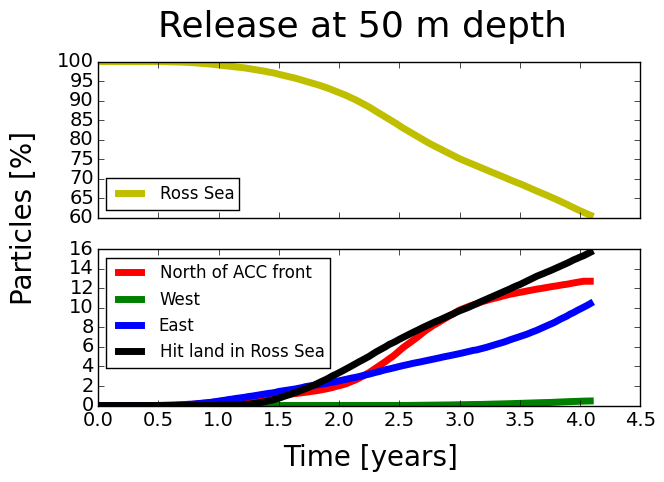

In [23]:
plot_1NPP(npts = Sum_Zones['Z1'][0], title = 'Release at 50 m depth', dictionary_of_zones=Sum_Zones, linewidth=5)

***

***

***

# Histograms

### With threshold 

In [99]:
Ind_parti_north = pickle_load('Ind_parti_north', path_save)
T_step_parti_north = pickle_load('T_step_parti_north', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ind_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/T_step_parti_north.npy')


In [100]:
# Check if lists containing indexes p and t have same length = nb of parti that go north
list_p_thresh = []
list_t_thresh = []

for NPP in npp:
    list_p_thresh.append(len(Ind_parti_north[NPP]))
    list_t_thresh.append(len(T_step_parti_north[NPP]))
    print len(T_step_parti_north[NPP]), len(Ind_parti_north[NPP])

1402 1402
1359 1359
1401 1401
1363 1363
1301 1301
1407 1407
1272 1272
1203 1203
1170 1170
1168 1168
1078 1078
1141 1141


In [101]:
import itertools

In [ ]:
# Make one list with all depths, longitudes, times of crossing for all NPPs

DEP_cross = []
LON_cross = []
TIME_cross = []
for NPP in npp:
    #print 'NPP', NPP
    DEP = pickle_load('NPP' + NPP + '_DEP', path_load, verbose=False)[:max_time_experiment]
    DEP_cross.append(DEP[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    LON = pickle_load('NPP' + NPP + '_LON', path_load, verbose=False)[:max_time_experiment]
    LON_cross.append(LON[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    TIME_cross.append(T_step_parti_north[NPP])
   
DEP_cross = list(itertools.chain(*DEP_cross))
LON_cross = list(itertools.chain(*LON_cross))
TIME_cross = list(itertools.chain(*TIME_cross))

In [104]:
pickle_save('DEP_cross', path_save, DEP_cross)
pickle_save('LON_cross', path_save, LON_cross)
pickle_save('TIME_cross', path_save, TIME_cross)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/DEP_cross.npy')
('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/LON_cross.npy')
('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/TIME_cross.npy')


### Function to plot histograms

In [31]:
def plot_hist(data, bins, weights, title, xlabel, title_save):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)

    if weights == True:
        weights = np.ones_like(np.array(data))/float(len(data))
        plt.hist(data, bins=bins, color='c', weights=weights, normed=True)
    else:
        plt.hist(data, bins=bins, color='c')
    ax.set_title(title, fontsize=18,  y=1.04)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Probability density', fontsize=16, labelpad=10)
    fig.tight_layout
    plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight')#, format='pdf') #  dpi=1000,

In [19]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)


    weights = np.ones_like(np.array(data))/float(len(data))
    ax.hist(data, bins=bins, color='c', weights=weights, normed=True)
else:
    ax.hist(data, bins=bins, color='c')
ax.set_title(title, fontsize=18,  y=1.04)
ax.set_xlabel(xlabel, fontsize=16)
ax.set_ylabel('Probability density', fontsize=16, labelpad=10)
fig.tight_layout
plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight')#, format='pdf') #  dpi=1000,

### Histograms of depth, lon, time (year) of crossing

In [106]:
print 'Depth :'
print 'min :', np.array(DEP_cross).min()
print 'max :', np.array(DEP_cross).max()
print ''

print 'Longitude :'
print 'min :', np.array(LON_cross).min()
print 'max :', np.array(LON_cross).max()
print ''

TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360
print 'Time :'
print 'min :', np.array(TIME_cross_yr).min()
print 'max :', np.array(TIME_cross_yr).max()

Depth :
min : 0.0815111
max : 163.851

Longitude :
min : 175.454
max : 268.983

Time :
min : 0.527777777778
max : 4.02777777778


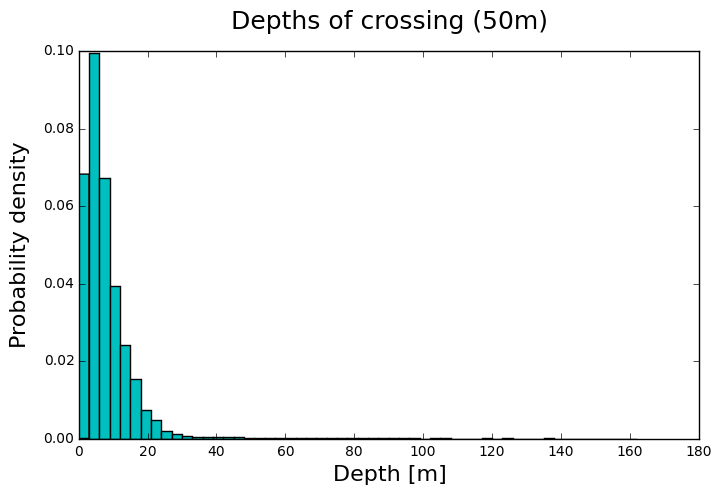

In [113]:
plot_hist(DEP_cross, np.arange(0, 164, 3), True, 'Depths of crossing (50m)', 'Depth [m]', 'depth_50m.png')

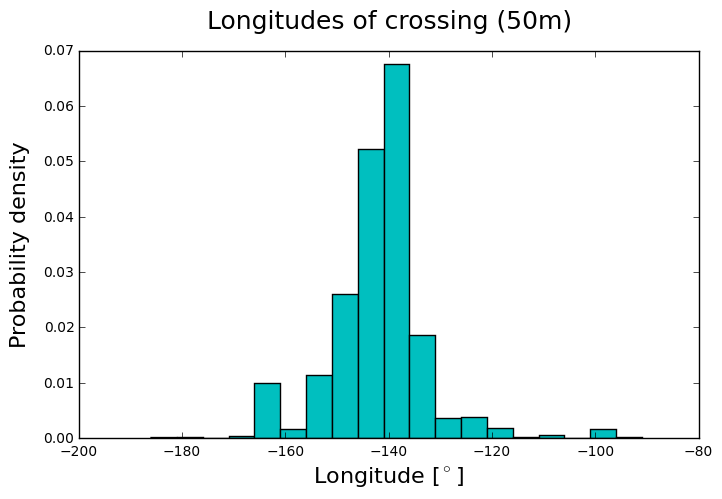

In [117]:
plot_hist(np.array(LON_cross)-360, np.arange(174-360, 270-360, 5), True, 'Longitudes of crossing (50m)', 'Longitude [$^\circ$]', 'lon_50m.png')

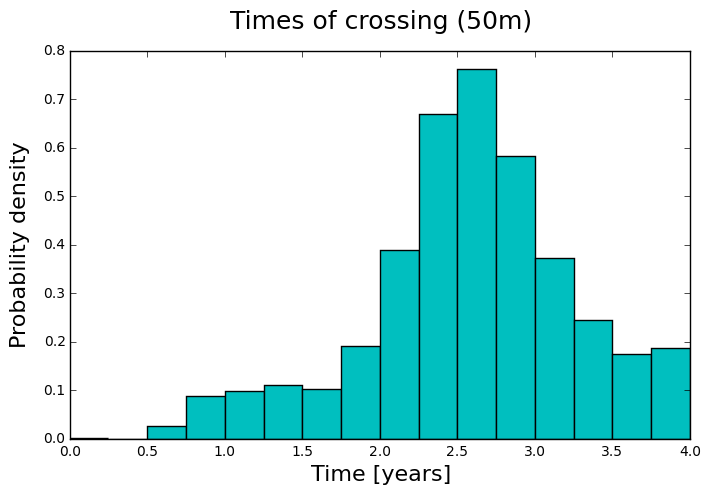

In [115]:
TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
plot_hist(TIME_cross_yr, np.arange(0, 4.1, 0.25), True, 'Times of crossing (50m)', 'Time [years]', 'time_50m.png')

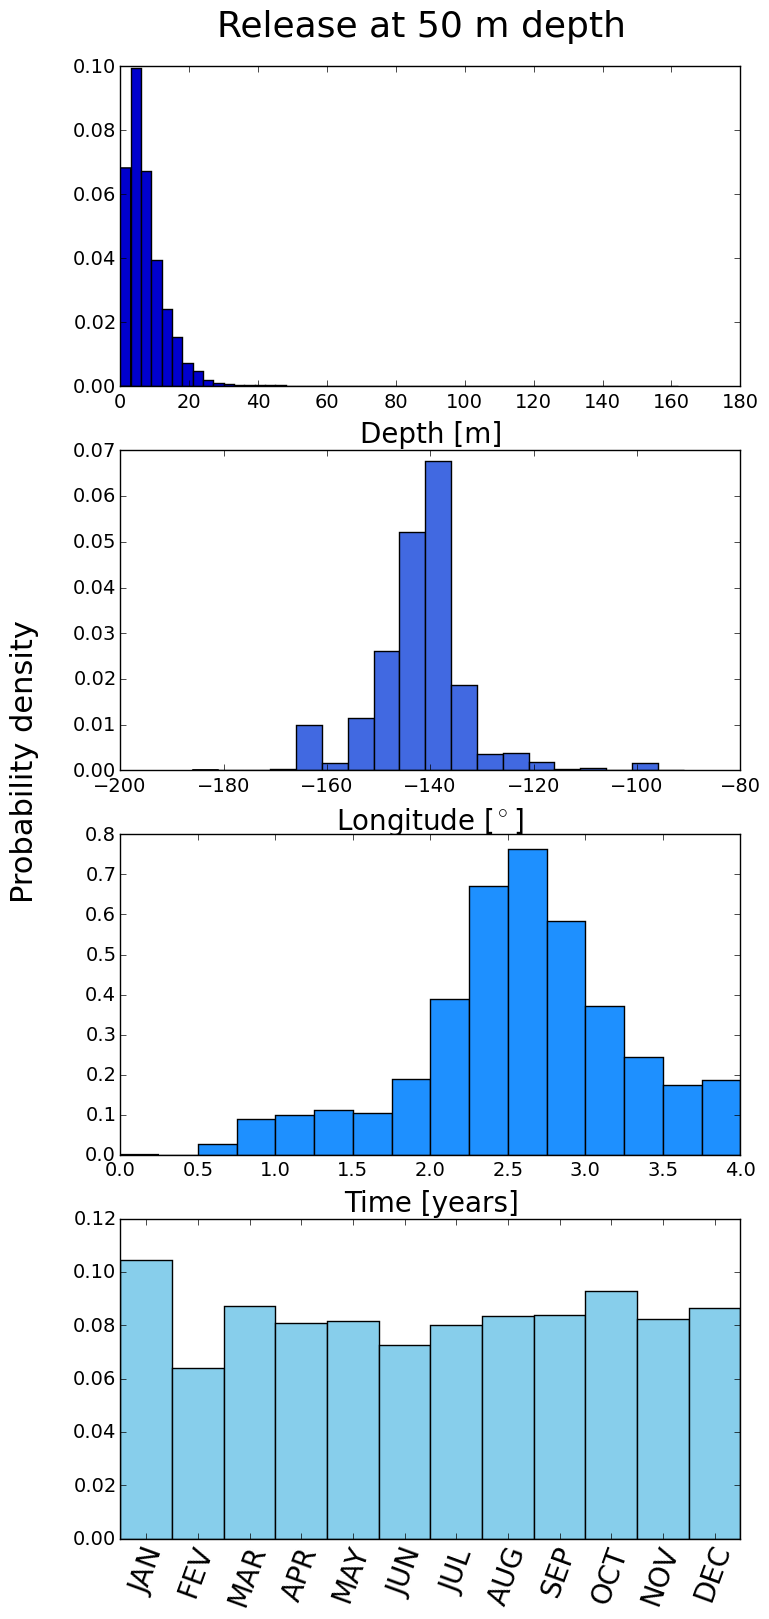

In [27]:
fig = plt.figure(figsize=(8,19))
fig.suptitle('Release at 50 m depth', fontsize=26, y=0.93)

# Depth
ax1 = fig.add_subplot(411)
weights = np.ones_like(np.array(DEP_cross))/float(len(DEP_cross))
plt.hist(DEP_cross, np.arange(0, 164, 3), color='mediumblue', weights=weights, normed=True)
ax1.set_xlabel('Depth [m]', fontsize=20, labelpad=7)
ax1.tick_params(labelsize=14)

# Longitude
ax2 = fig.add_subplot(412)
weights = np.ones_like(np.array(np.array(LON_cross)-360))/float(len(np.array(LON_cross)-360))
plt.hist(np.array(LON_cross)-360, np.arange(174-360, 270-360, 5), color='royalblue', weights=weights, normed=True)
ax2.set_xlabel('Longitude [$^\circ$]', fontsize=20, labelpad=7)
ax2.tick_params(labelsize=14)

# Time
ax3 = fig.add_subplot(413)
TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
weights = np.ones_like(np.array(TIME_cross_yr))/float(len(TIME_cross_yr))
plt.hist(TIME_cross_yr, np.arange(0, 4.1, 0.25), color='dodgerblue', weights=weights, normed=True)
ax3.set_xlabel('Time [years]', fontsize=20, labelpad=7)
ax3.tick_params(labelsize=14)

# Months
ax4 = fig.add_subplot(414)
x_coordinates = np.arange(len(num.keys()))
plt.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='skyblue')
x_coordinates = np.arange(len(num.keys()))+0.5
plt.xticks(x_coordinates, Y, rotation=70)
ax4.tick_params(labelsize=14)
tick = plt.gca()
tick.tick_params(axis = 'x', which = 'major', labelsize = 20)

# Titre yaxis
ax2.set_ylabel('Probability density', fontsize=22, labelpad=25, y=0.03)
plt.savefig('/home/ebent/Final_figs/' + '4hist_50m.png', bbox_inches='tight')#, format='pdf') #  dpi=1000,
plt.show()

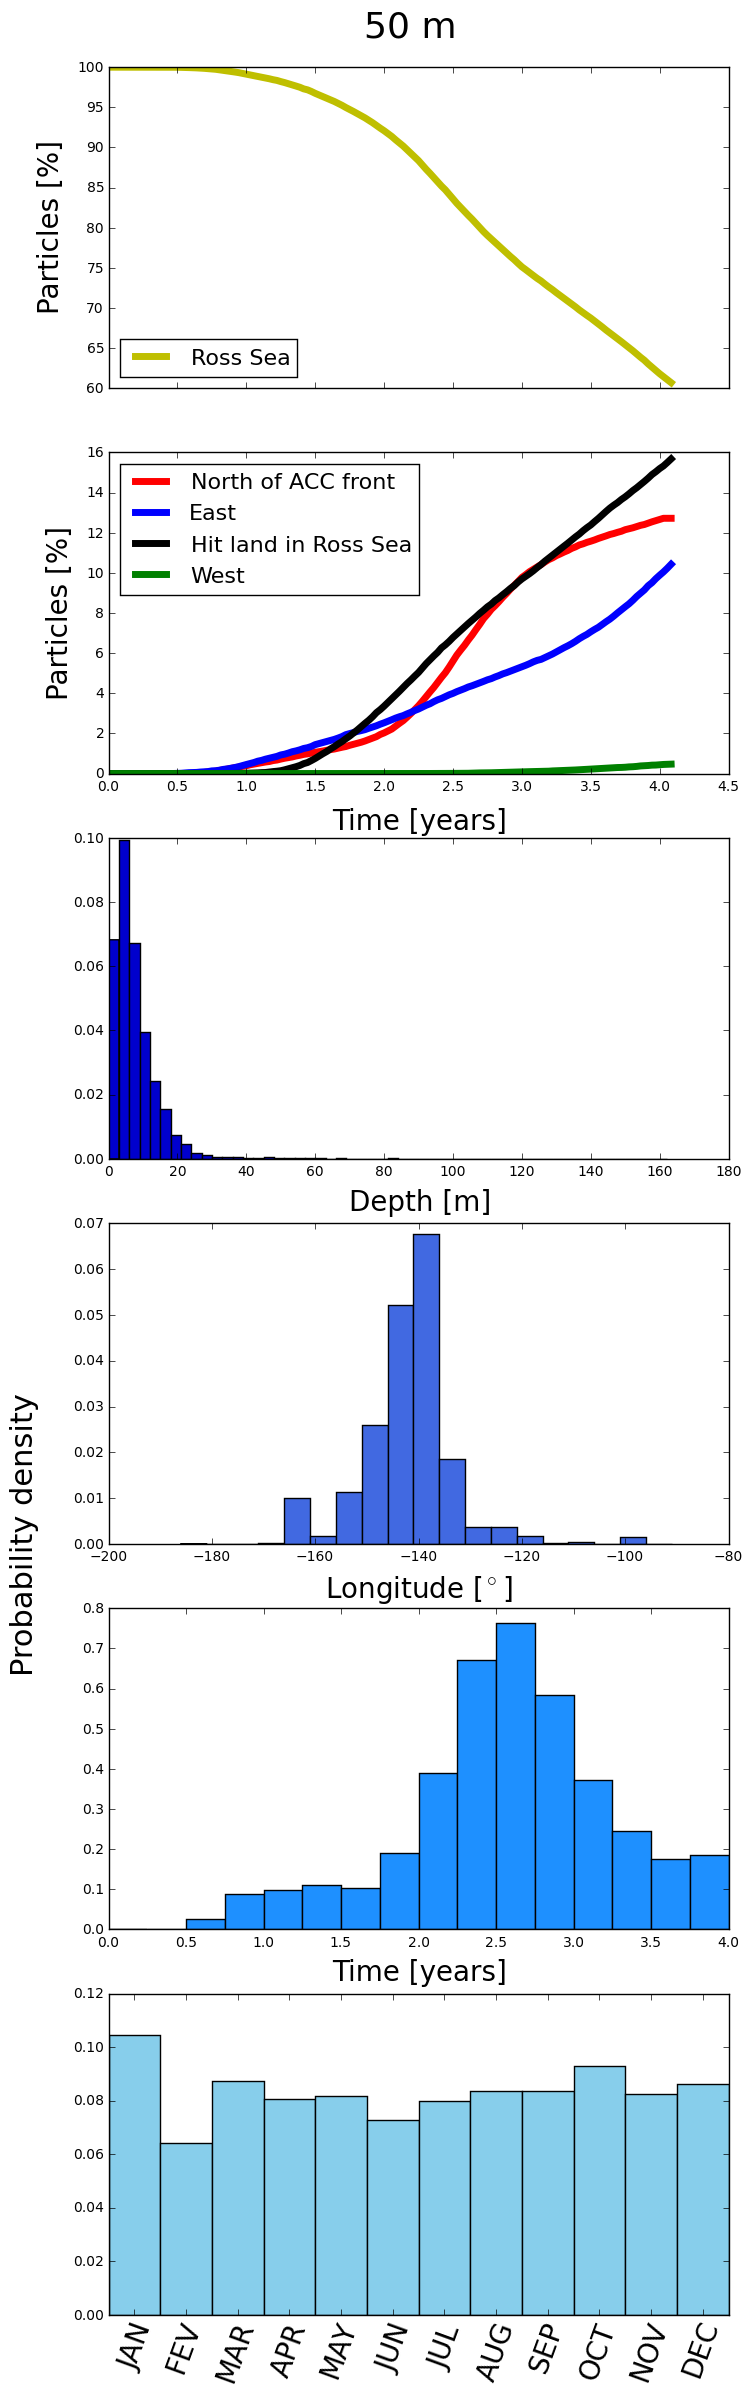

In [26]:
fig = plt.figure(figsize=(8,29))
fig.suptitle('50 m', fontsize=26, y=0.92)

# Line plots
dictionary_of_zones=Sum_Zones
linewidth=5
time = (np.arange(np.int_(dictionary_of_zones['Z1'].shape))*10)/360. #(np.arange(148)*10)/360. #(np.arange(np.int_(Z1.shape))*10)/360.

ax5 = fig.add_subplot(611)
ax5.plot(time, dictionary_of_zones['Z1'] *100./npts, '-y', label='Ross Sea', linewidth=linewidth)

ax5.legend(loc='lower left', fontsize=16) #bbox_to_anchor=(1.04,0.5)
ax5.set_ylabel('Particles [%]', fontsize=20, labelpad=10)
ax5.set_xticklabels([])
#ax5.set_xlabel(title, fontsize=18, y=1.04)

ax6 = fig.add_subplot(612)
ax6.plot(time, dictionary_of_zones['Z2'] *100./npts, '-r', label='North of ACC front', linewidth=linewidth)
ax6.plot(time, dictionary_of_zones['Z4'] *100./npts, '-b', label='East', linewidth=linewidth)
#ax6.plot(time, dictionary_of_zones['Z5'] *100./npts, '-c', label='East and West', linewidth=linewidth)
ax6.plot(time, dictionary_of_zones['dead'] *100./npts, '-k', label='Hit land in Ross Sea', linewidth=linewidth)
ax6.plot(time, dictionary_of_zones['Z3'] *100./npts, '-g', label='West', linewidth=linewidth)

ax6.legend(loc='upper left', fontsize=16)
ax6.set_xlabel('Time [years]', fontsize=20, labelpad=10)
ax6.set_ylabel('Particles [%]', fontsize=20, labelpad=10)
#ax6.xaxis.set_ticks_position('top') 
#plt.subplots_adjust(hspace = .01)

# Depth
ax1 = fig.add_subplot(613)
weights = np.ones_like(np.array(DEP_cross))/float(len(DEP_cross))
plt.hist(DEP_cross, np.arange(0, 164, 3), color='mediumblue', weights=weights, normed=True)
ax1.set_xlabel('Depth [m]', fontsize=20, labelpad=7)

# Longitude
ax2 = fig.add_subplot(614)
weights = np.ones_like(np.array(np.array(LON_cross)-360))/float(len(np.array(LON_cross)-360))
plt.hist(np.array(LON_cross)-360, np.arange(174-360, 270-360, 5), color='royalblue', weights=weights, normed=True)
ax2.set_xlabel('Longitude [$^\circ$]', fontsize=20, labelpad=7)

# Time
ax3 = fig.add_subplot(615)
TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
weights = np.ones_like(np.array(TIME_cross_yr))/float(len(TIME_cross_yr))
plt.hist(TIME_cross_yr, np.arange(0, 4.1, 0.25), color='dodgerblue', weights=weights, normed=True)
ax3.set_xlabel('Time [years]', fontsize=20, labelpad=7)

# Months
ax4 = fig.add_subplot(616)
x_coordinates = np.arange(len(num.keys()))
plt.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='skyblue')
x_coordinates = np.arange(len(num.keys()))+0.5
plt.xticks(x_coordinates, Y, rotation=70, fontsize=20)
tick = plt.gca()
tick.tick_params(axis = 'x', which = 'major', labelsize = 20)

# Titre yaxis
npts = Sum_Zones['Z1'][0]
title = 'Percentage of particles in each zone - 50m'
dictionary_of_zones=Sum_Zones
linewidth=5

ax2.set_ylabel('Probability density', fontsize=22, labelpad=25, y=0.03)

#fig.tight_layout()

plt.savefig('/home/ebent/Final_figs/' + '6figs_50m.png', bbox_inches='tight')#, format='pdf') #  dpi=1000,
plt.show()

***

### Histogram of months of crossing

#### This makes a list of 5yrs filled with the info on which month it is

In [250]:
MAY = []
JUL = []
AUG = []
OCT = []
DEC = []
JAN = []
MAR = []

for i in range(1,32):
    MAY.append('MAY')
    JUL.append('JUL')
    AUG.append('AUG')
    OCT.append('OCT')
    DEC.append('DEC')
    JAN.append('JAN')
    MAR.append('MAR')

In [251]:
JUN = []
SEP = []
NOV = []

for i in range(1,31):
    JUN.append('JUN')
    SEP.append('SEP')
    NOV.append('NOV')

In [252]:
FEV = []
for i in range(1,29):
    FEV.append('FEV')

In [253]:
beg_APR = []
end_APR = []

for i in range(1,6):
    beg_APR.append('APR')
    
for i in range(6,31):
    end_APR.append('APR')

In [254]:
Year = []
Year = [beg_APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC, JAN, FEV, MAR, end_APR]

In [255]:
Year_1_list = list(itertools.chain(*Year))

In [256]:
Five_Years = []
for i in range(5):
    Five_Years.append(Year_1_list)

In [257]:
Five_Years_1_list = list(itertools.chain(*Five_Years))

In [258]:
len(Five_Years_1_list)

1825

In [259]:
pickle_save('Five_Years_1_list', path_load, Five_Years_1_list)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/Five_Years_1_list.npy')


In [68]:
Five_Years_1_list = pickle_load('Five_Years_1_list', path_load)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/Five_Years_1_list.npy')


### Searchs the month that correspond to the time in index

In [30]:
analysis = []
for i in range(len(TIME_cross)):
    analysis.append(Five_Years_1_list[np.array(TIME_cross[i])*10])

In [31]:
from collections import Counter

num = Counter(analysis)

In [32]:
x = list(num.values())
y = list(num.keys())

In [33]:
X = list(x)
Y = list(y)

In [34]:
for i in range(12):
    if y[i] == 'JAN':
        Y[0] = y[i]
        X[0] = x[i]
    if y[i] == 'FEV':
        Y[1] = y[i]
        X[1] = x[i]
    if y[i] == 'MAR':
        Y[2] = y[i]
        X[2] = x[i]
    if y[i] == 'APR':
        Y[3] = y[i]
        X[3] = x[i]
    if y[i] == 'MAY':
        Y[4] = y[i]
        X[4] = x[i]
    if y[i] == 'JUN':
        Y[5] = y[i]
        X[5] = x[i]
    if y[i] == 'JUL':
        Y[6] = y[i]
        X[6] = x[i]
    if y[i] == 'AUG':
        Y[7] = y[i]
        X[7] = x[i]
    if y[i] == 'SEP':
        Y[8] = y[i]
        X[8] = x[i]
    if y[i] == 'OCT':
        Y[9] = y[i]
        X[9] = x[i]
    if y[i] == 'NOV':
        Y[10] = y[i]
        X[10] = x[i]
    if y[i] == 'DEC':
        Y[11] = y[i]
        X[11] = x[i]

In [35]:
for i in range(12):
    print i, Y[i]

0 JAN
1 FEV
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


### Plot the histogram

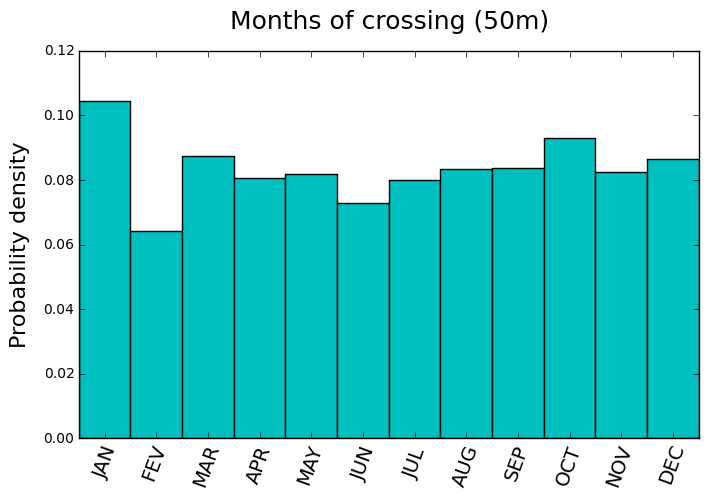

In [116]:
x_coordinates = np.arange(len(num.keys()))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='c')

x_coordinates = np.arange(len(num.keys()))+0.5

ax.set_title('Months of crossing (50m)', fontsize=18, y=1.04)
plt.xticks(x_coordinates, Y, rotation=70)
tick = plt.gca()
tick.tick_params(axis = 'x', which = 'major', labelsize = 14)
ax.set_ylabel('Probability density', fontsize=16, labelpad=10)
fig.tight_layout
plt.savefig('/home/ebent/Final_figs/' + 'month_50m.png', bbox_inches='tight')#, format='pdf') #  dpi=1000,